In [8]:
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from util.functions import Functions
from wrappers.visualizer import Visualizer

level = 'regioni'

path_data = './data'
path_img = '{path_data}/imgs/mappe/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
path_geojson = '{path_data}/geojson'.format(path_data=path_data)

csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)
geojson_regions_name = '{path_geojson}/Italy_NUTS_2.json'.format(path_geojson=path_geojson)

In [9]:
# Read geojson NUTS 2 file
with open(geojson_regions_name, encoding='utf-8') as geojson_regions:
    json_regions = json.load(geojson_regions)
properties = json_regions['features'][0]['properties']
properties

{'reg_name': 'Piemonte', 'reg_istat_code_num': 1, 'reg_istat_code': '01'}

In [10]:
df_r = pd.read_csv(csv_in_name)
last_date = df_r.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_r.columns
# totale_ospedalizzati = ricoverati_con_sintomi + terapia_intensiva
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# variazione_totale_positivi = totale_positivi(S) - totale_positivi(S - 1)
# totale_casi = totale_positivi + dimessi_guariti + deceduti

Index(['data', 'codice_regione', 'denominazione_regione',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'popolazione',
       'totale_posti_terapia_intensiva', 'variazione_ricoverati_con_sintomi',
       'variazione_terapia_intensiva', 'variazione_totale_ospedalizzati',
       'posti_disponibili_terapia_intensiva', 'saturazione_terapia_intensiva',
       'variazione_isolamento_domiciliare', 'variazione_nuovi_positivi',
       'nuovi_tamponi', 'nuovi_casi_testati', 'nuovi_deceduti',
       'nuovi_dimessi_guariti', 'np_su_nt', 'np_su_p', 'tc_su_p'],
      dtype='object')

In [11]:
# Print stats
print('Nuovi positivi:', df_r['nuovi_positivi'].sum())
print('Nuovi tamponi:', df_r['nuovi_tamponi'].sum())
print('Percentuale nuovi positivi/nuovi tamponi:', (df_r['nuovi_positivi'].sum()/df_r['nuovi_tamponi'].sum()).round(4) * 100, '%')
print('Nuovi guariti:', df_r['nuovi_dimessi_guariti'].sum())
print('Nuovi deceduti:', df_r['nuovi_deceduti'].sum())
print('Variazione positivi ricoverati con sintomi:', df_r['variazione_ricoverati_con_sintomi'].sum())
print('Variazione positivi in terapia intensiva:', df_r['variazione_terapia_intensiva'].sum())
print('Variazione positivi in isolamento dimiciliare:', df_r['variazione_isolamento_domiciliare'].sum())
# print(df_r['nuovi_casi_testati'].sum())

Nuovi positivi: 32616
Nuovi tamponi: 191144
Percentuale nuovi positivi/nuovi tamponi: 17.06 %
Nuovi guariti: 6183
Nuovi deceduti: 331
Variazione positivi ricoverati con sintomi: 1331
Variazione positivi in terapia intensiva: 115
Variazione positivi in isolamento dimiciliare: 24654


In [12]:
# Set interactive
interactive = False

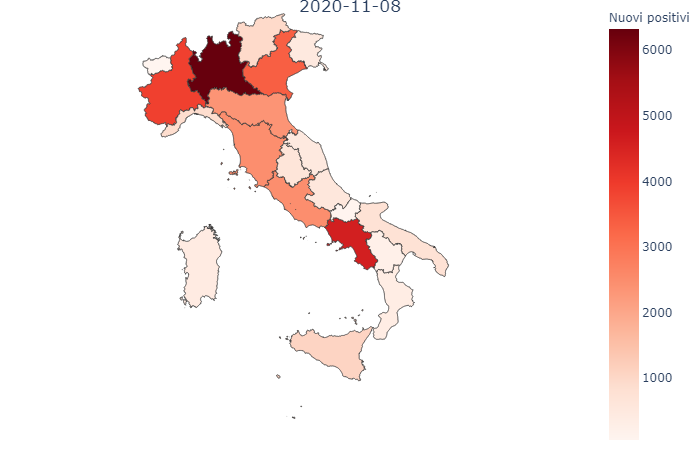

In [13]:
# New positives
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='nuovi_positivi',
    featureidkey='properties.reg_name',
    colorbar_title='Nuovi positivi',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'nuovi_positivi', 'ext': 'html'},
    interactive=interactive)

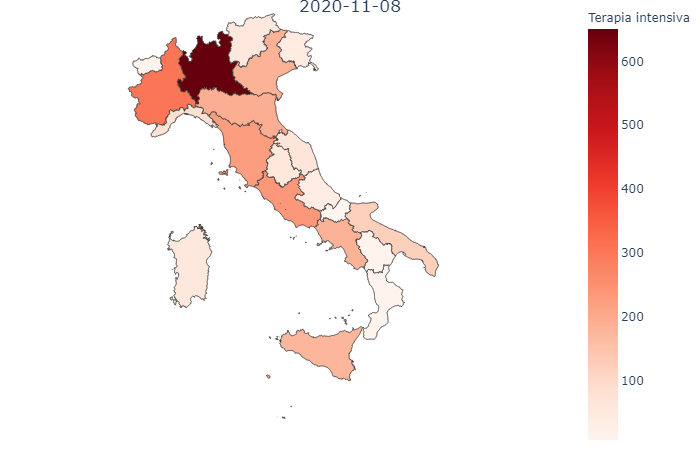

In [14]:
# Positives in ICU
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='terapia_intensiva',
    featureidkey='properties.reg_name',
    colorbar_title='Terapia intensiva',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'terapia_intensiva'},
    interactive=interactive)

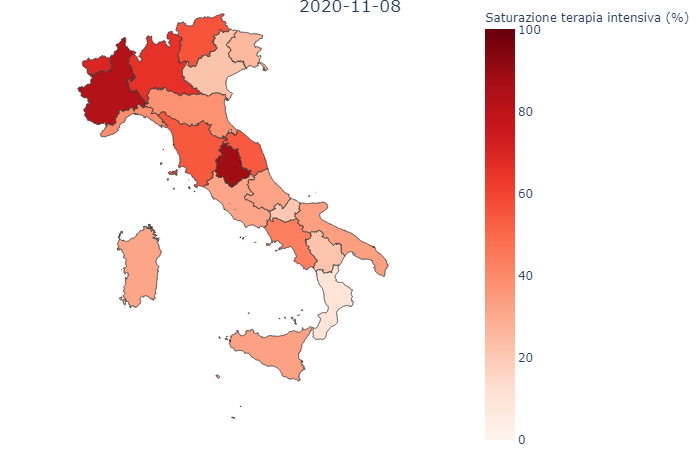

In [15]:
# ICU saturation
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='saturazione_terapia_intensiva',
    featureidkey='properties.reg_name',
    colorbar_title='Saturazione terapia intensiva (%)',
    fig_title=last_date,
    zmin=0,
    zmax=100,
    save_info={'path': path_img, 'file_name': 'saturazione_terapia_intensiva'},
    interactive=interactive)

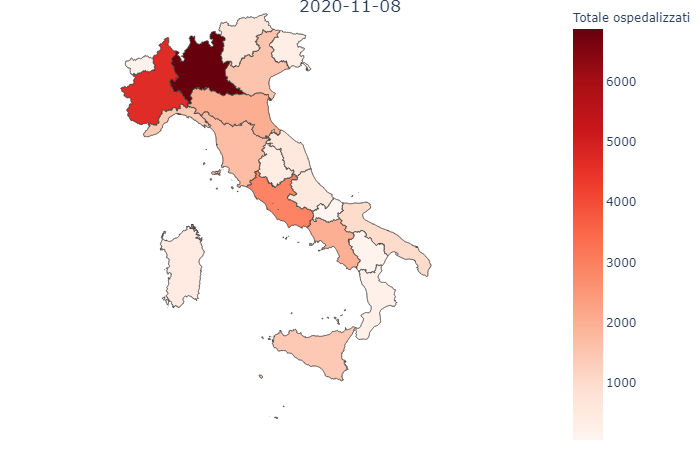

In [16]:
# Hospitalized positives
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='totale_ospedalizzati',
    featureidkey='properties.reg_name',
    colorbar_title='Totale ospedalizzati',
    fig_title=last_date,
    save_info={'path': path_img, 'file_name': 'totale_ospedalizzati'},
    interactive=interactive)

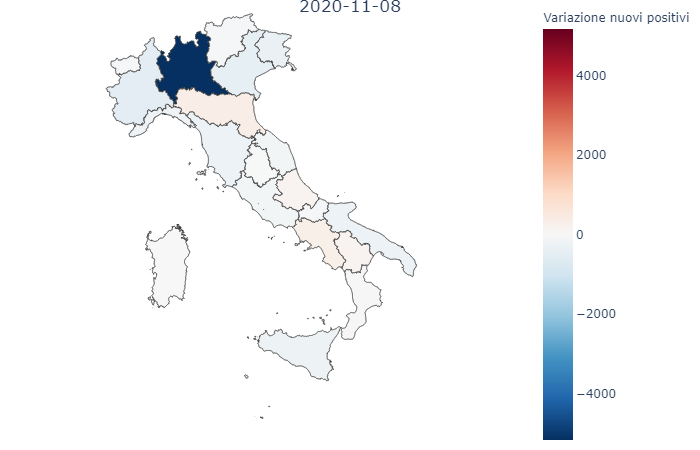

In [17]:
# Variation of new positives with respect to the day before
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='variazione_nuovi_positivi',
    colorscale_color='RdBu',
    reversescale=True,
    featureidkey='properties.reg_name',
    colorbar_title='Variazione nuovi positivi',
    fig_title=last_date,
    zmid=0,
    save_info={'path': path_img, 'file_name': 'variazione_nuovi_positivi'},
    interactive=interactive)

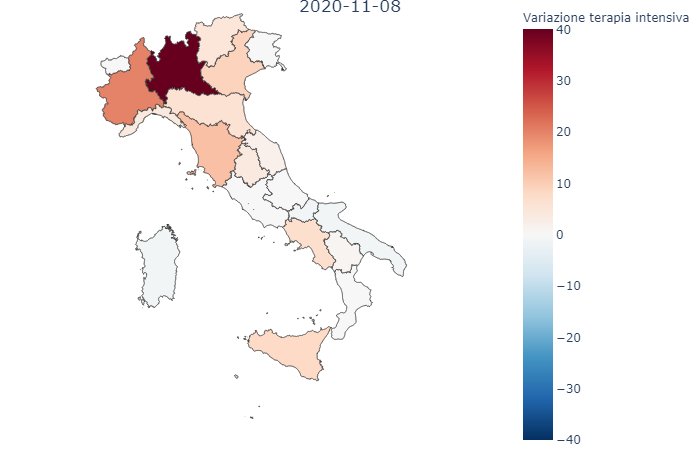

In [18]:
# Variation of positives in ICU with respect to the day before
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='variazione_terapia_intensiva',
    colorscale_color='RdBu',
    reversescale=True,
    featureidkey='properties.reg_name',
    colorbar_title='Variazione terapia intensiva',
    fig_title=last_date,
    zmid=0,
    save_info={'path': path_img, 'file_name': 'variazione_terapia_intensiva'},
    interactive=interactive)

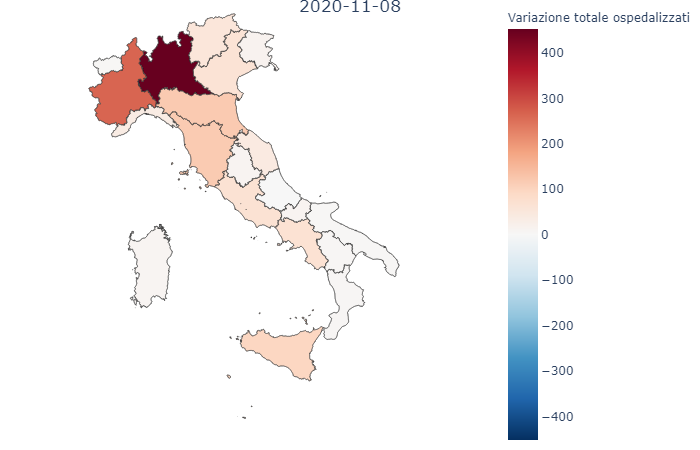

In [19]:
# Variation of hospitalized positives with respect to the day before
Visualizer.choropleth_go(
    df=df_r,
    geojson=json_regions,
    locations='denominazione_regione', 
    color='variazione_totale_ospedalizzati',
    colorscale_color='RdBu',
    reversescale=True,
    featureidkey='properties.reg_name',
    colorbar_title='Variazione totale ospedalizzati',
    fig_title=last_date,
    zmid=0,
    save_info={'path': path_img, 'file_name': 'variazione_totale_ospedalizzati'},
    interactive=interactive)